# Hierarchical Risk Parity
## Import

In [1]:
import matplotlib.pyplot as mpl
import warnings

warnings.filterwarnings("ignore")

## Import py file

In [2]:
from RiskLabAI.optimization.hrp import *

## Data

In [3]:
allCrypto = pd.DataFrame()
listCrypto = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BNB-USD', 'ADA-USD', 'XRP-USD', 'DOGE-USD']
for symb in listCrypto:
    data = pd.DataFrame(yf.Ticker(symb).history(start="2019-01-01", end="2021-08-08")['Close']).transpose()
    # data.save_batch_run(symb + '.csv')
    if symb == 'BTC-USD':
        allCrypto = data.copy()
    else:
        #  Add data to allCrypto
        allCrypto = pd.concat([allCrypto, data])
allCrypto.index = [listCrypto]
allCrypto = allCrypto.transpose()
allCrypto = allCrypto.pct_change(1)

## Hierarchical Risk Parity on Real Data

In [4]:
cov, corr = allCrypto.cov(), allCrypto.corr()
#2) compute and plot correl matrix
plot_corr_matrix('HRP3_corr0.png', corr, labels=corr.columns)

(DOGE-USD,)     5.075329
(XRP-USD,)     17.012221
(BNB-USD,)     18.776970
(ADA-USD,)     10.690741
(BTC-USD,)     24.349103
(ETH-USD,)     12.952388
(LTC-USD,)     11.143249
dtype: float64


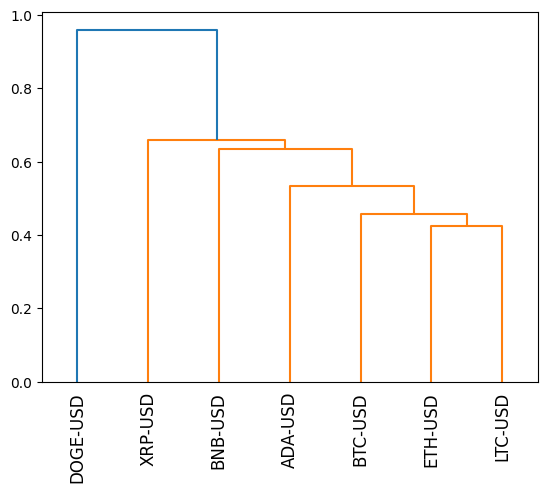

In [5]:
#3) cluster
distance = distance_corr(corr)
link = sch.linkage(distance, 'single')
sortIx = quasi_diagonal(link)
sortIx_index = sortIx.copy()
sortIx = corr.index[sortIx].tolist()  # recover labels
dataframe = corr.loc[sortIx, sortIx]  # reorder
plot_corr_matrix('HRP3_corr1.png', dataframe, labels=dataframe.columns)
#4) Capital allocation 
hrp = recursive_bisection(cov, sortIx)
print(hrp * 100)


def llf(id):
    for i in range(10):
        if i == id:
            return listCrypto[i]


sch.dendrogram(link, leaf_label_func=llf, leaf_rotation=90)
mpl.show()

## Hierarchical Risk Parity on Simulated Data

In [6]:
#1) Generate correlated data
numberObs, size0, size1, sigma1 = 10000, 5, 5, .25
data, cols = random_data(numberObs, size0, size1, sigma1)
#print [(j+1,size0+i) for i,j in enumerate(cols,1)]
cov, corr = data.cov(), data.corr()
#2) compute and plot correl matrix
plot_corr_matrix('HRP3_corr0.png', corr, labels=corr.columns)
#3) cluster
dist = distance_corr(corr)
link = sch.linkage(dist, 'single')
sortIx = quasi_diagonal(link)
sortIx = corr.index[sortIx].tolist()  # recover labels
dataframe = corr.loc[sortIx, sortIx]  # reorder
plot_corr_matrix('HRP3_corr1.png', dataframe, labels=dataframe.columns)
#4) Capital allocation
hrp = recursive_bisection(cov, sortIx)
print(hrp)

8     0.071408
3     0.075961
9     0.125317
2     0.067596
10    0.063236
1     0.109945
7     0.103968
5     0.193357
4     0.097549
6     0.091662
dtype: float64


## Hierarchical Risk Parity on Simulated Data

In [7]:
hrp_mc(number_iterations=10, number_observations=520, size_correlated=5, size_uncorrelated=5, mu_uncorrelated=0,
       sigma_correlated=1e-2, sigma_uncorrelated=.25, length_sample=260, test_size=20)

            0         1    2
hrp  5.165883  26.68635  0.0
